In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from pyclustering.nnet.som import type_conn
# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import dtwsom

In [12]:
def gen_sine(f0, fs, dur):
    t = np.arange(dur)
    sinusoid = np.sin(2*np.pi*t*(f0/fs))
    #norm_sinusoid = sinusoid/np.std(sinusoid)
    return sinusoid

def gen_noisy_sine(f0, fs, dur):
    norm_sinusoid = gen_sine(f0, fs, dur)
    noise = np.random.normal(0,0.1, dur)
    noisy_sinusoid = noise + norm_sinusoid
    return noisy_sinusoid

def gen_noisy_sine_list(f0, fs, mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        noisy_sinusoid = gen_noisy_sine(f0, fs, dur)
        final_list.append(noisy_sinusoid)
    return final_list

def gen_noisy_list(mean_dur, size):
    final_list = []
    for i in range(size):
        dur = random.sample([mean_dur-1, mean_dur, mean_dur+1], 1)[0]
        noise = np.random.normal(0,0.1, dur)+10
        final_list.append(noise)
    return final_list


def gen_sin_dataset():
    sin_dataset = gen_noisy_sine_list(1, 20, 25, 50) + gen_noisy_list(20, 50)
    return sin_dataset

***

In [13]:
sin_dataset = gen_sin_dataset()
len(sin_dataset)

100

In [14]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four;  # each neuron has max. four neighbors.
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [15]:
%%time
network.train(sin_dataset, 20)

Epoch 1 achieved an average quantization error of 2.5838
Epoch 2 achieved an average quantization error of 0.459
Epoch 3 achieved an average quantization error of 0.4165
Epoch 4 achieved an average quantization error of 0.4161
Epoch 5 achieved an average quantization error of 0.4131
Epoch 6 achieved an average quantization error of 0.4109
Epoch 7 achieved an average quantization error of 0.4094
Epoch 8 achieved an average quantization error of 0.4076
Epoch 9 achieved an average quantization error of 0.4061
Epoch 10 achieved an average quantization error of 0.405
Epoch 11 achieved an average quantization error of 0.4018
Epoch 12 achieved an average quantization error of 0.3983
Epoch 13 achieved an average quantization error of 0.394
Epoch 14 achieved an average quantization error of 0.3813
Epoch 15 achieved an average quantization error of 0.3727
Epoch 16 achieved an average quantization error of 0.3677
Epoch 17 achieved an average quantization error of 0.3643
Epoch 18 achieved an avera

20

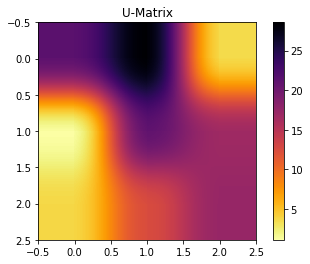

In [16]:
network.show_distance_matrix()

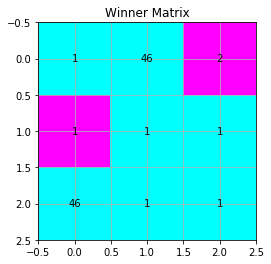

In [17]:
network.show_winner_matrix()

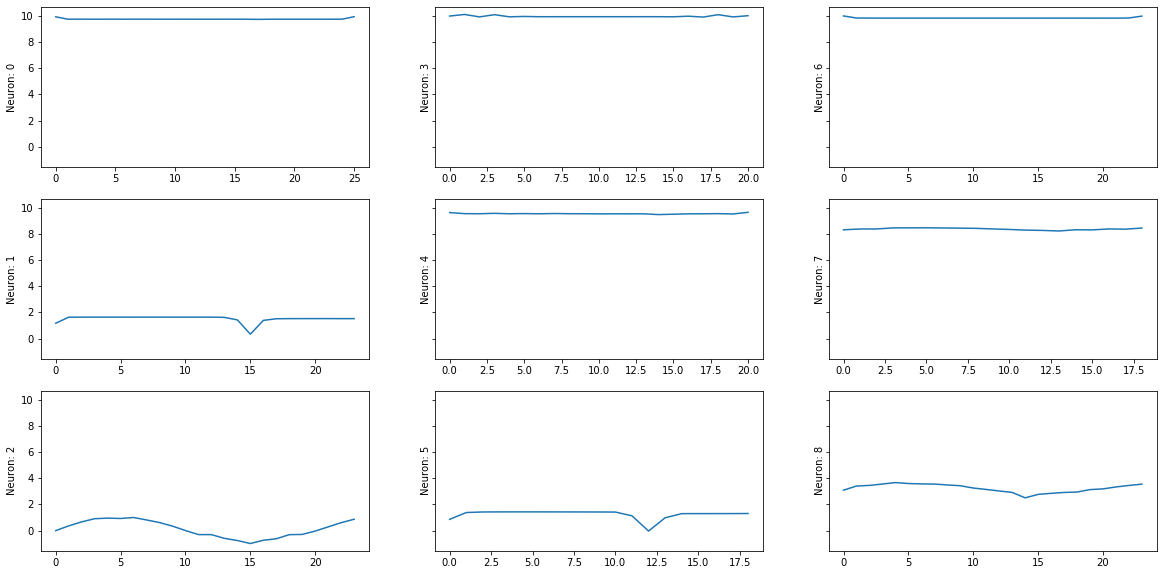

In [20]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(20, 10), sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_ylabel("Neuron: "+str(neuron_index))
plt.show()